## Linear Regression

In [2]:
import os
import json
import pandas as pd 
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline, AutoModel
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn import metrics
import math
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import numpy as np

In [3]:
df = pd.read_csv('filtered_data_.csv')
df.drop(columns=["user_id", "review_id", "book_id"], inplace=True)
df = df.dropna(subset=['review_text'])
df = df[(df["rating"] != 0)] # remove reviews with no rating
df["review_text"] = df["review_text"].astype(str)
df

,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments,type
0,4,Fun sequel to the original.,735919,735919,735079.8,735663.8,7,0,children
1,5,One of my favorite books to read to my 5 year ...,735545,736354,736353.0,735663.8,4,0,children
2,5,One of the best and most imaginative childrens...,735529,735529,735079.8,735663.8,6,1,children
3,5,My daughter is loving this. Published in the 6...,735204,736410,735079.8,735663.8,5,4,children
4,5,A friend sent me this. Hilarious!,734268,734531,734268.0,734268.0,5,0,children
...,...,...,...,...,...,...,...,...,...
39995,3,*3.5 stars*,735888,736092,735889.0,735888.0,26,2,young_adult
39996,3,Written in the Stars is actually a book I don'...,735792,736092,735793.0,735792.0,55,3,young_adult
39997,3,*2.5 stars* \n I originally rated this a 3.5 b...,735790,735827,735827.0,735819.0,25,7,young_adult
39998,3,*3.75 stars* \n I've never given that kind of ...,735778,735781,735781.0,735778.0,11,0,young_adult


(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

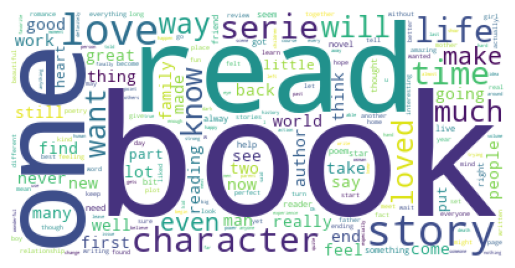

In [4]:
df5 = df[df.rating == 5]
text5 = ''
for line in df5.review_text:
    text5 += line + " "
wordcloud5 = WordCloud(background_color="white").generate(text5)
plt.imshow(wordcloud5)
plt.axis("off")

(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

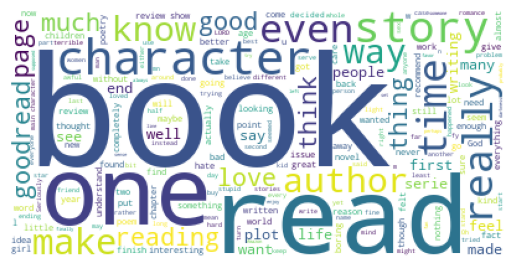

In [5]:
df1 = df[df.rating == 1]
text1 = ''
for line in df1.review_text:
    text1 += line + " "
wordcloud1 = WordCloud(background_color="white").generate(text1)
plt.imshow(wordcloud1)
plt.axis("off")

## Linear Regression

Mean Squared Error: 4.262793335660832
Root Mean Squared Error: 2.0646533209381257
R^2: -3.2377484488620727


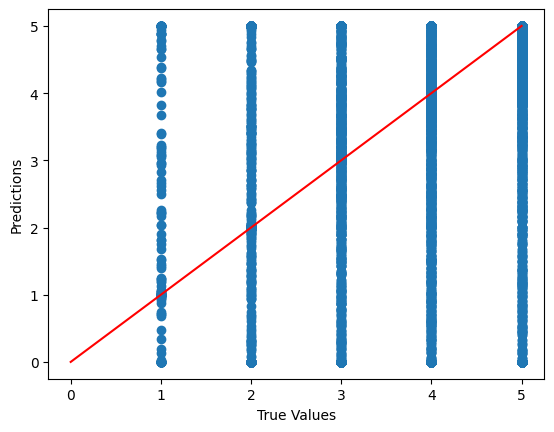

       Real  Predicted
5342      2   4.279869
12589     4   5.000000
29345     4   2.058397
14509     2   5.000000
1431      3   3.213240
...     ...        ...
33136     3   3.776677
26593     4   0.000000
1102      4   0.000000
15034     5   5.000000
29496     1   0.000000

[7778 rows x 2 columns]


In [13]:
#data preprocessing
df = pd.read_csv('filtered_data_.csv')
df.drop(columns=["user_id", "review_id", "book_id"], inplace=True)
df = df.dropna(subset=['review_text'])
df = df[(df["rating"] != 0)] # remove reviews with no rating
df["review_text"] = df["review_text"].astype(str)
df

#se o ratiing for maior que 5, passa a ser 5
df.loc[df['rating'] > 5, 'rating'] = 5
#se o rating for menor que 0, passa a ser 0
df.loc[df['rating'] < 0, 'rating'] = 0

#separar os dados em treino e teste
X = df['review_text']
y = df['rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#usar o modelo para prever o rating de um livro e comparar com o rating real
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

model = linear_model.LinearRegression()
model.fit(X_train, y_train)

#cannot have negative values in predictions
y_pred = model.predict(X_test)
y_pred = np.clip(y_pred, 0, 5)

print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print ('R^2:', metrics.r2_score(y_test, y_pred))

plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.plot([0, 5], [0, 5], 'r')
plt.show()


#compare with real values
df = pd.DataFrame({'Real': y_test, 'Predicted': y_pred})
print(df)



## Linear Regression with TF-IDF Vectorizer, Ridge Regression and Grid Seacrh 

Mean Squared Error: 0.5942435387431289
Root Mean Squared Error: 0.7708719340740905
R^2: 0.40924777809698454


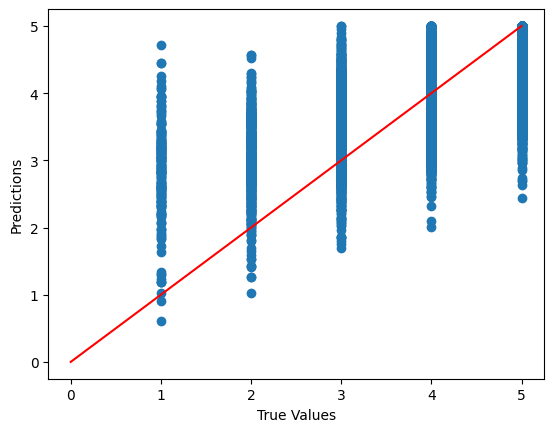

       Real  Predicted
5342      2   2.749549
12589     4   4.718038
29345     4   4.030770
14509     2   2.662148
1431      3   2.633409
...     ...        ...
33136     3   3.674052
26593     4   3.500152
1102      4   3.484526
15034     5   3.627889
29496     1   2.787514

[7778 rows x 2 columns]


In [15]:
##Whit ridge regression and grid search

# Data preprocessing
df = pd.read_csv('filtered_data_.csv')
df.drop(columns=["user_id", "review_id", "book_id"], inplace=True)
df = df.dropna(subset=['review_text'])
df = df[(df["rating"] != 0)] # remove reviews with no rating
df["review_text"] = df["review_text"].astype(str)

# Adjust ratings
df.loc[df['rating'] > 5, 'rating'] = 5
df.loc[df['rating'] < 0, 'rating'] = 0

# Split data into train and test sets
X = df['review_text']
y = df['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use TF-IDF Vectorizer
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Use Ridge Regression with Grid Search for hyperparameter tuning
ridge = Ridge()
parameters = {'alpha': [0.1, 1.0, 10.0]}
grid_search = GridSearchCV(ridge, parameters, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)
y_pred = np.clip(y_pred, 0, 5)

# Evaluation
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', metrics.r2_score(y_test, y_pred))

# Plotting
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.plot([0, 5], [0, 5], 'r')
plt.show()

# Compare with real values
df_results = pd.DataFrame({'Real': y_test, 'Predicted': y_pred})
print(df_results)